https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough <br/>
https://psb.stanford.edu/psb-online/proceedings/psb18/olson.pdf

# <font color="#2086BA">1. Importing packages and Data</font>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from collections import OrderedDict
import warnings

pd.options.display.max_columns = 150
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'
%matplotlib inline

In [8]:
folderPath = "D:/Rep/MyLearning/competitions/kaggle/CostoRiconHVP";

In [9]:
fileName = "train.csv"
df_train = pd.read_csv(os.path.join(folderPath,fileName))

In [10]:
fileName = "test.csv"
df_test = pd.read_csv(os.path.join(folderPath,fileName))

In [11]:
data = pd.concat([df_train,df_test],sort=False)

In [12]:
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33413 entries, 0 to 23855
Columns: 143 entries, Id to Target
dtypes: float64(9), int64(129), object(5)
memory usage: 36.7+ MB


In [14]:
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# <font color="#2086BA">2. Data Cleaning and Missing Value Treatment</font>

### <font color="#135589">Treating columns with object dtype</font> 

In [15]:
datatypes = data.dtypes.reset_index()
datatypes.columns = ["Column Name", "Column Type"]
print(datatypes[datatypes['Column Type']=='object'])
del(datatypes)

    Column Name Column Type
0            Id      object
95      idhogar      object
100  dependency      object
101      edjefe      object
102      edjefa      object


In [16]:
mapping = {'yes':1,"no":0}
data['dependency'] = data['dependency'].replace(mapping).astype(np.float32)
data['edjefa'] = data['edjefa'].replace(mapping).astype(np.float32)
data['edjefe'] = data['edjefe'].replace(mapping).astype(np.float32)

df_train['dependency'] = df_train['dependency'].replace(mapping).astype(np.float32)
df_train['edjefa'] = df_train['edjefa'].replace(mapping).astype(np.float32)
df_train['edjefe'] = df_train['edjefe'].replace(mapping).astype(np.float32)

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


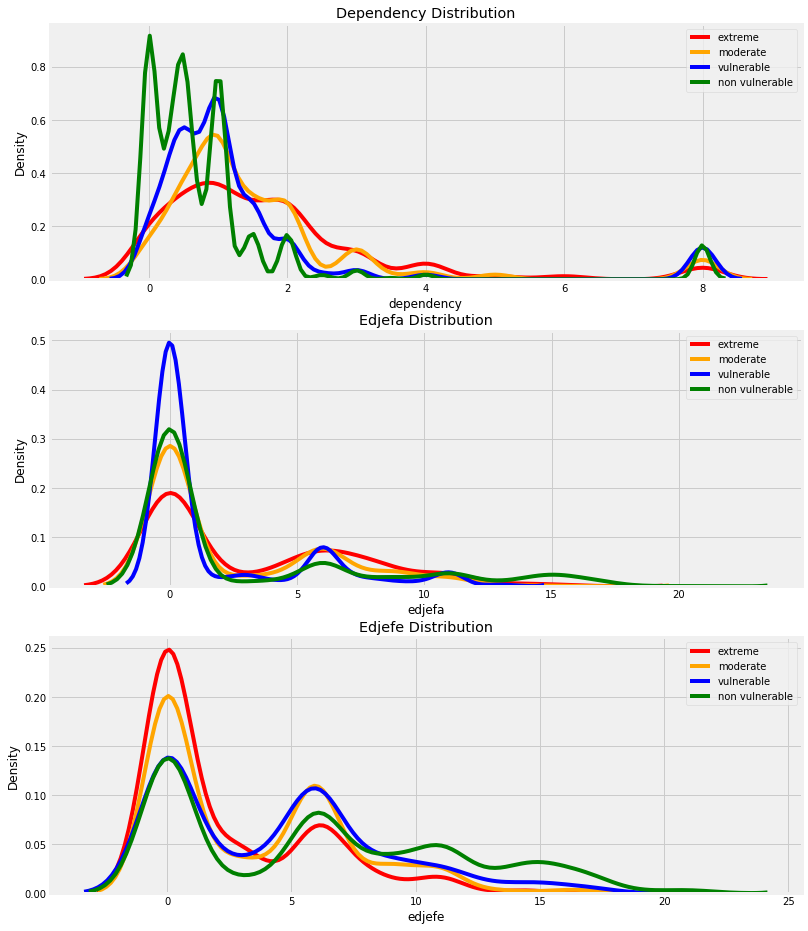

In [17]:
fig = plt.figure(figsize=(12,16))
for i,col in enumerate(['dependency','edjefa','edjefe']):
    ax = plt.subplot(3,1,i+1)
    for poverty_level,color in colors.items():
        sns.kdeplot(df_train.loc[df_train['Target']==poverty_level,col].dropna(),ax=ax,color=color,label=poverty_mapping[poverty_level])
        plt.title("{0} Distribution".format(col.capitalize()));
        plt.xlabel(col);
        plt.ylabel('Density')     
#plt.subplots_adjust(top = 2)
plt.show()

### <font color="#135589">Missing Value Treatment</font> 

In [18]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})
missing['percent'] = missing['total'] / len(data)
missing = missing[missing['total']>0]
missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
meaneduc,36,0.001077
SQBmeaned,36,0.001077


###### <font color="orange">1. v18q1 (Tablets owned by family)</font>

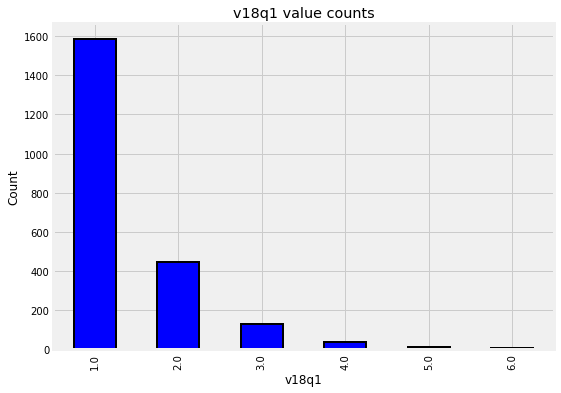

In [19]:
plot_value_counts(df_train,'v18q1')

In [20]:
tabletscount = df_train.groupby('idhogar').agg({'v18q1':'first','v18q':'sum'}).reset_index()
matching = len(tabletscount[(tabletscount['v18q']==0) & tabletscount['v18q1'].isnull()]) == len(tabletscount[(tabletscount['v18q']==0)])
print(f'The length of v18q1 counts with null values matching with length of v18q totaled to 0 is : {matching}')
del(tabletscount)
del(matching)

print('Above analysis proves that the null values in v18q1 represents 0')

The length of v18q1 counts with null values matching with length of v18q totaled to 0 is : True
Above analysis proves that the null values in v18q1 represents 0


In [21]:
df_train['v18q1'].fillna(0,inplace=True)
data['v18q1'].fillna(0,inplace=True)

##### <font color="orange">2. v2a1 Monthly rent payment</font>

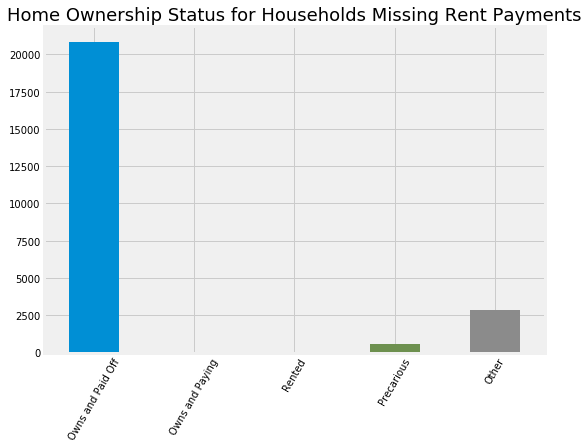

From above graph it is clear that the individuals who own there house have missing rent details


In [22]:
ownershipcols = [x for x in data.columns if x.startswith('tipo')]
data.loc[data['v2a1'].isnull(),ownershipcols].sum().plot.bar(figsize=(8,6))
plt.xticks([0, 1, 2, 3, 4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);
plt.show()
print('From above graph it is clear that the individuals who own there house have missing rent details')

In [23]:
data.loc[(data['v2a1'].isnull()) & (data['tipovivi1'] == 1),'v2a1'] = 0
df_train.loc[(df_train['v2a1'].isnull()) & (df_train['tipovivi1'] == 1),'v2a1'] = 0
data['v2a1-missing'] = data['v2a1'].isnull()
df_train['v2a1-missing'] = df_train['v2a1'].isnull()
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

##### <font color="orange">3. rez_esc Years behind in school</font>

In [24]:
data.loc[data['rez_esc'].notnull(),'age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

The maximum age where value is not null is 17 and min value is 7. So we can assume that individuals whose age is > 17 or lower than 7 should have years behind in school set to 0.

In [25]:
data.loc[(data['rez_esc'].isnull()) & ((data['age']>19) | data['age']<7),'rez_esc'] = 0
df_train.loc[(df_train['rez_esc'].isnull()) & ((df_train['age']>19) | df_train['age']<7),'rez_esc'] = 0

In [26]:
data.loc[data['rez_esc'].isnull(),'rez_esc-missing'] = True
df_train.loc[df_train['rez_esc'].isnull(),'rez_esc-missing'] = True

In [27]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5
df_train.loc[df_train['rez_esc'] > 5, 'rez_esc'] = 5

In [28]:
data['rez_esc-missing'].value_counts()

Series([], Name: rez_esc-missing, dtype: int64)

### <font color="#135589">Label Correction</font> 

In this dataset individuals of same household are assigned to different poverty levels. It is being told that the head of the houehold should be considered as the true poverty level. But again there are few households where there is not head of household.

In [29]:
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
not_equal = all_equal[all_equal!=True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [30]:
household_heads = df_train.groupby('idhogar')['parentesco1'].sum()
households_no_head = df_train.loc[df_train['idhogar'].isin(household_heads[household_heads==0].index),:]
print('There are {0} households without a head'.format(len(households_no_head)))
households_no_head_Equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x : x.nunique()==1)
print('There are {0} households with no head and having Target discrepancies'.format(sum(households_no_head_Equal==False)))

There are 23 households without a head
There are 0 households with no head and having Target discrepancies


In [31]:
type(df_train[(df_train['idhogar']=='0172ab1d9') & (df_train['parentesco1']==1)]["Target"])

pandas.core.series.Series

In [32]:
for household in not_equal.index:
    true_target = int(df_train.loc[(df_train['idhogar']==household) & (df_train['parentesco1']==1),"Target"])
    df_train.loc[(df_train['idhogar']==household),"Target"] = true_target
    data.loc[(data['idhogar']==household),"Target"] = true_target
    
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
not_equal = all_equal[all_equal == False]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


### <font color="#135589">Label Exploration</font> 

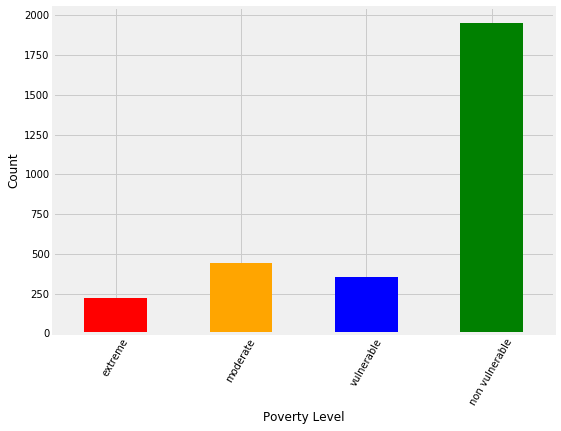

In [33]:
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1']==1),['Target','idhogar']]
label_counts = train_labels['Target'].value_counts().sort_index()
label_counts.plot.bar(figsize=(8,6),color=colors.values())
plt.xlabel('Poverty Level');
plt.ylabel('Count');
plt.xticks([x-1 for x in poverty_mapping.keys()],list(poverty_mapping.values()),rotation = 60)
plt.show()

# <font color="#2086BA">3. Feature Engineering</font>
<strong>Define Variable Categories</strong><br/>
There are several different categories of variables:

Individual Variables: these are characteristics of each individual rather than the household<br/>
    ->Boolean: Yes or No (0 or 1)<br/>
    ->Ordered Discrete: Integers with an ordering<br/>
Household variables<br/>
    ->Boolean: Yes or No<br/>
    ->Ordered Discrete: Integers with an ordering<br/>
    ->Continuous numeric<br/>
Squared Variables: derived from squaring variables in the data<br/>
Id variables: identifies the data and should not be used as features<br/>

In [34]:
id_ = ['Id', 'idhogar', 'Target']

In [35]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']
ind_ordered = ['rez_esc', 'escolari', 'age']

In [36]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']
hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']
hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [37]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [38]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

In [39]:
from collections import Counter
print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


#### <font color="orange">Squared variables</font> 
These variables would have made sense in Linear models but we'll be using complex models so no need to use these

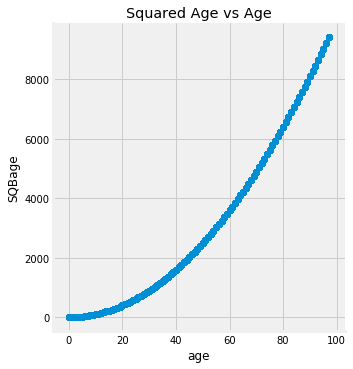

In [40]:
sns.lmplot('age','SQBage',data=data,fit_reg=False)
plt.title('Squared Age vs Age')
plt.show()

In [41]:
data = data.drop(columns=sqr_)
df_train = df_train.drop(columns=sqr_)

In [42]:
data.shape

(33413, 136)

### <font color="#135589">Household Level variables</font>

In [43]:
heads = data.loc[data['parentesco1']==1,:]
heads = heads[id_+hh_bool+hh_cont+hh_ordered]
heads.shape

(10307, 99)

##### <font color="orange">Removing Redundant variables</font>

In [44]:
corr_matrix = heads.corr()

In [45]:
np.triu([[1,2,3,9],[4,5,6,9],[7,8,9,9],[10,11,12,9]], 2)

array([[0, 0, 3, 9],
       [0, 0, 0, 9],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [46]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(abs(upper[col])>0.95)]
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [47]:
corr_matrix.loc[corr_matrix['hogar_total'].abs()>0.9,corr_matrix['hogar_total'].abs()>0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


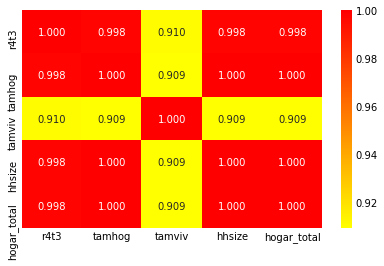

In [48]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9,corr_matrix['tamhog'].abs()>0.9],annot=True,cmap=plt.cm.autumn_r, fmt='.3f')

from above as hhsize has perfect correlation with tamhog and hogar total and also hhsize has has nearly perfect correlation with r4t3 and hogar total, <strong>so removing these three colums tamhog, hogar_total and r4t3<strong>

In [49]:
heads = heads.drop(columns=['tamhog','hogar_total','r4t3'])
data = data.drop(columns=['tamhog','hogar_total','r4t3'])
df_train = df_train.drop(columns=['tamhog','hogar_total','r4t3'])

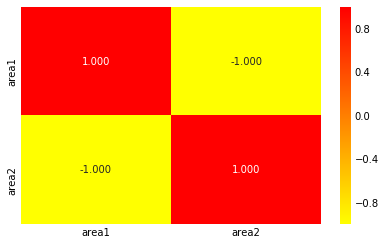

In [50]:
#checking of correlation of area1
sns.heatmap(corr_matrix.loc[corr_matrix['area1'].abs()>0.9,corr_matrix['area1'].abs()>0.9],annot=True,cmap=plt.cm.autumn_r, fmt='.3f')

In [51]:
heads = heads.drop(columns=['area2'])
data = data.drop(columns=['area2'])
df_train = df_train.drop(columns=['area2'])

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


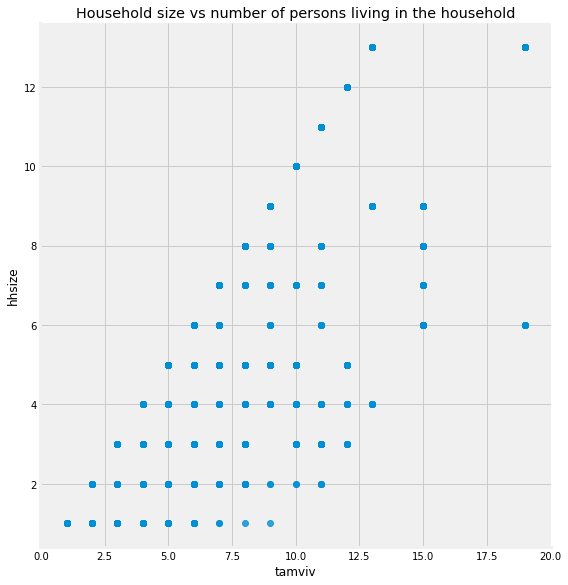

In [52]:
sns.lmplot('tamviv','hhsize',data=data,fit_reg=False, size = 8);
plt.title('Household size vs number of persons living in the household');

We see for a number of cases, there are more people living in the household than there are in the family. This gives us a good idea for a new feature: the difference between these two measurements!

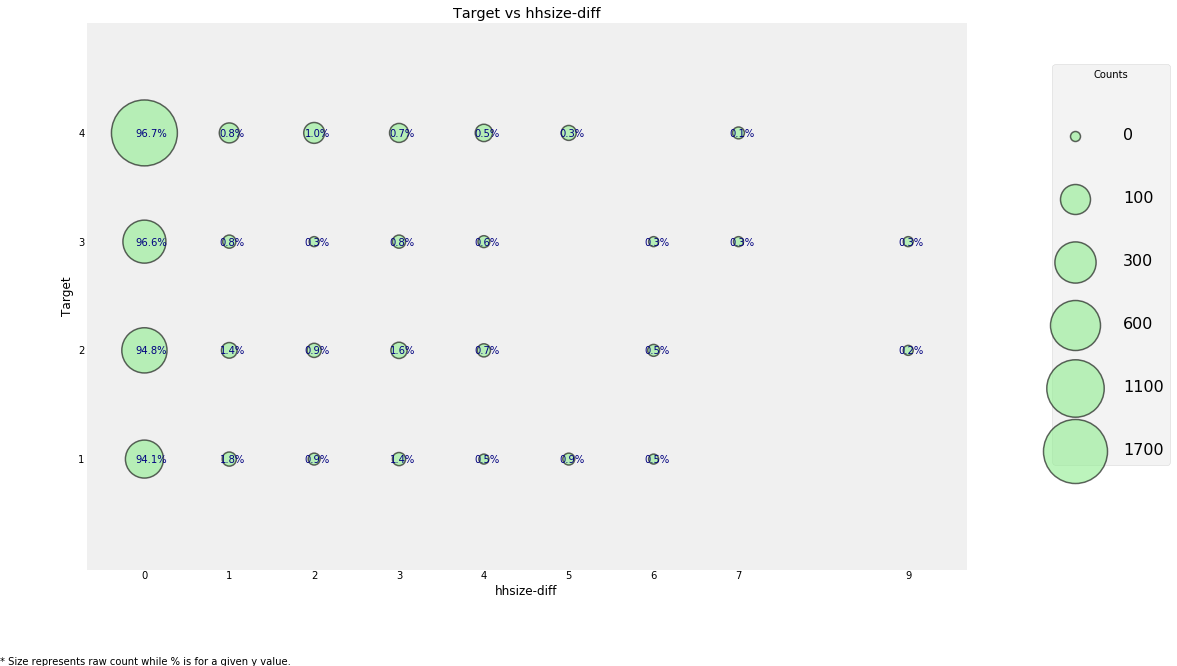

In [53]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

In [54]:
corr_matrix.loc[corr_matrix['coopele'].abs()>0.9,corr_matrix['coopele'].abs()>0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


In [55]:
#checking for coopele (type of electricity service)
#first converting into ordinal variable
elec = []

# Assign values
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
# Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

In [56]:
#Remove the electricity columns
heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

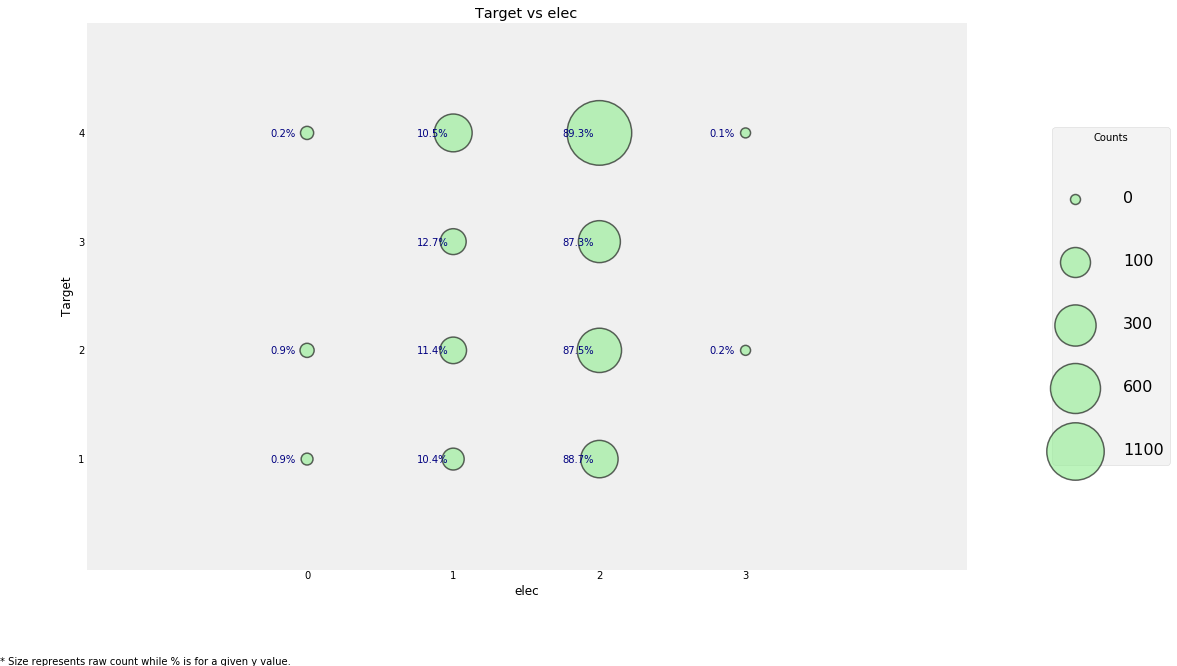

In [57]:
plot_categoricals('elec','Target',heads)

##### <font color="orange">Creating Ordinal Variables</font>

In [58]:
#for walls
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),axis = 1)
heads = heads.drop(columns=['epared1', 'epared2', 'epared3'])

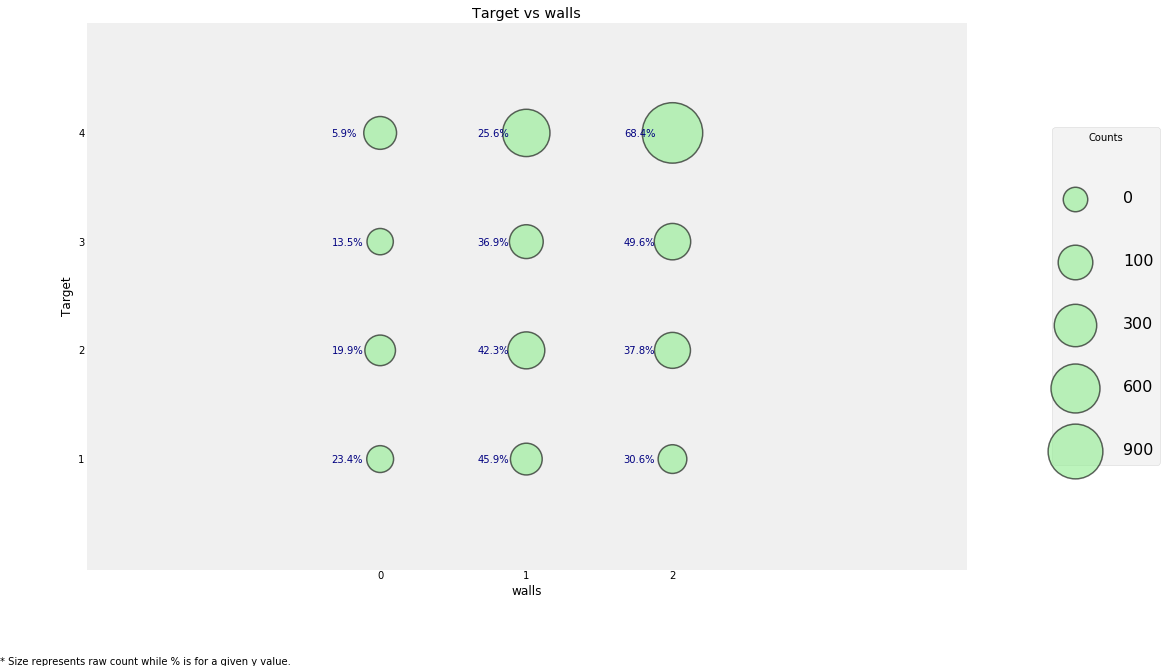

In [59]:
plot_categoricals('walls','Target',heads)

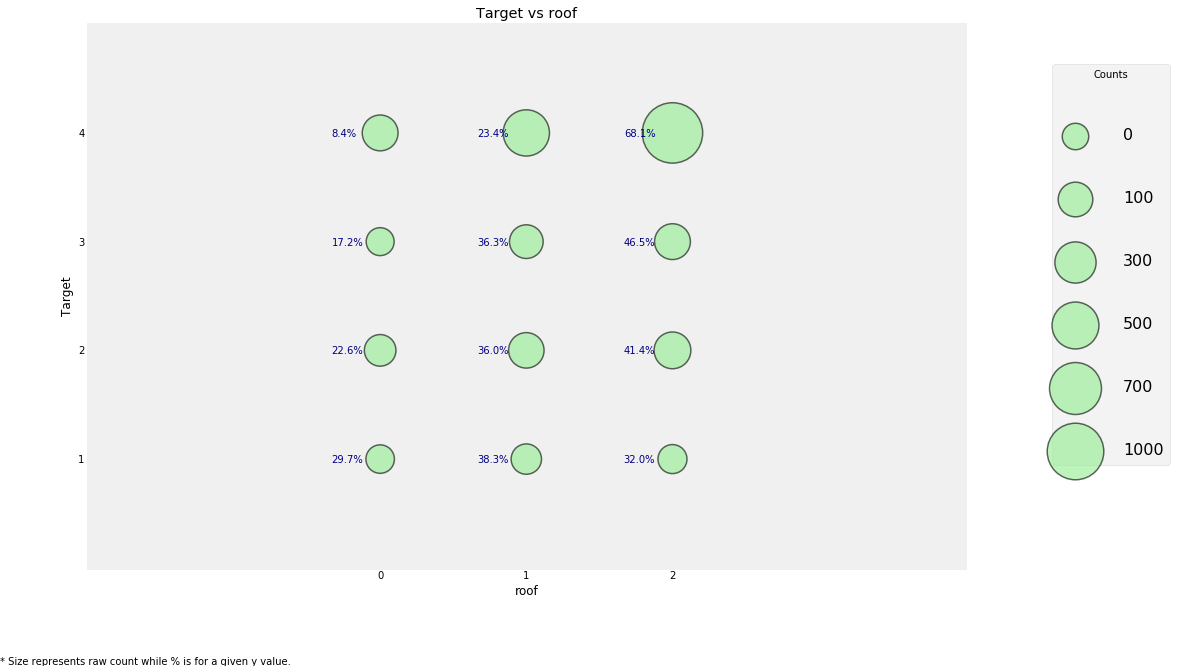

In [60]:
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),axis = 1)
heads = heads.drop(columns=['etecho1', 'etecho2', 'etecho3'])
plot_categoricals('roof','Target',heads)

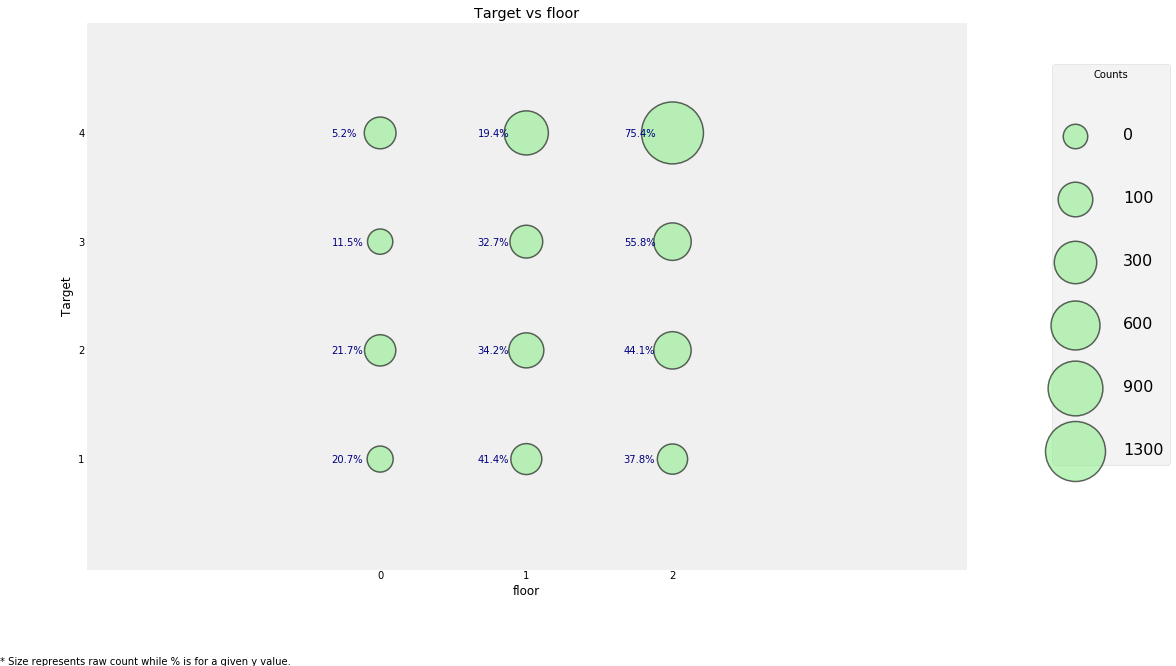

In [61]:
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),axis = 1)
heads = heads.drop(columns=['eviv1', 'eviv2', 'eviv3'])
plot_categoricals('floor','Target',heads)

#### <font color="orange">Feature Construction</font>

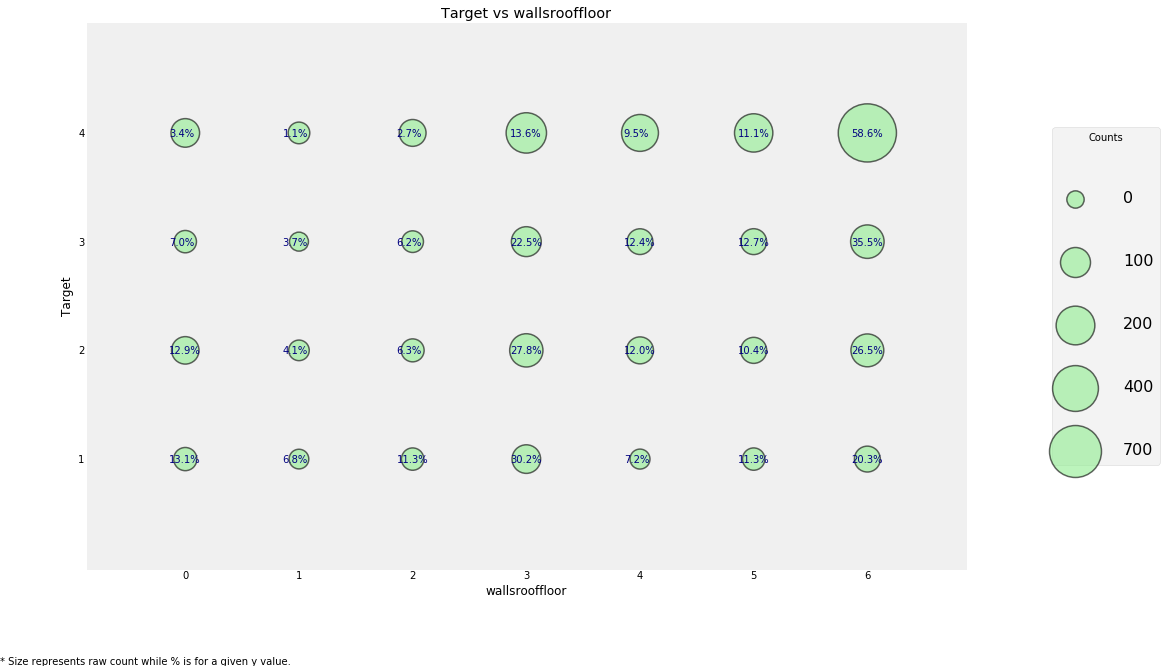

In [62]:
#House condition
heads['wallsrooffloor'] = heads['walls'] + heads['roof'] + heads['floor']
plot_categoricals('wallsrooffloor','Target',heads)

In [63]:
counts = pd.DataFrame(heads.groupby('wallsrooffloor')['Target'].value_counts(normalize=True)).rename(columns={'Target':'Normalized count'}).reset_index()
counts.head()

,wallsrooffloor,Target,Normalized count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529


In [64]:
#Check if households does not have basic household needs
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Target vs Warning variable')

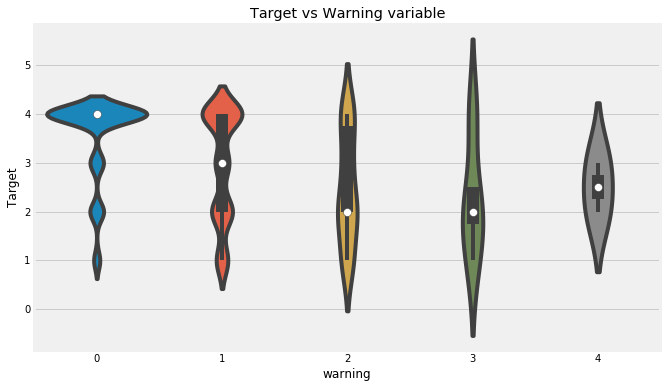

In [65]:
plt.figure(figsize=(10,6))
sns.violinplot(x="warning",y="Target",data=heads)
plt.title("Target vs Warning variable")

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


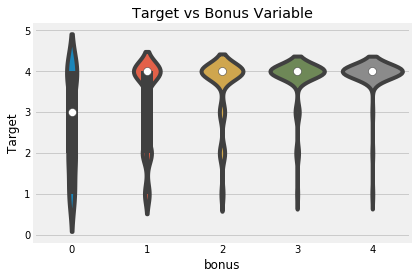

In [66]:
# Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                      heads['computer'] + 
                      (heads['v18q1'] > 0) + 
                      heads['television'])

sns.violinplot('bonus', 'Target', data = heads,
                figsize = (10, 6));
plt.title('Target vs Bonus Variable');

In [67]:
#per capita feature
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

#### <font color="orange">Measuring Relationships</font>

In [68]:
#COmputing Pearson correlation
train_heads = heads.loc[heads['Target'].notnull(),:].copy()
pcorrs = pd.DataFrame(heads.corr()['Target'].sort_values()).rename(columns={'Target':'pcorr'}).reset_index().rename(columns={'index':'feature'})
print("Most negatively correlated variables")
print(pcorrs.head())

print("Most positively correlated variables")
print(pcorrs.dropna().tail())

Most negatively correlated variables
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4          r4m1 -0.209479
Most positively correlated variables
              feature     pcorr
87  phones-per-capita  0.299026
88              floor  0.307605
89     wallsrooffloor  0.332446
90           meaneduc  0.333652
91             Target  1.000000


In [69]:
#Computing Spearman correlation
from scipy.stats import spearmanr;
warnings.filterwarnings('ignore',category=RuntimeWarning)
feats = []
scorr = []
pvalues = []
for col in heads:
    if(heads[col].dtype != 'object'):
        feats.append(col)
        scorr.append(spearmanr(train_heads[col].values,train_heads['Target'].values).correlation)
        pvalues.append(spearmanr(train_heads[col].values,train_heads['Target'].values).pvalue)
        
scorrs = pd.DataFrame({'feature':feats,'scorr':scorr,'pvalue':pvalues}).sort_values('scorr')
print("Most negatively correlated variables")
print(scorrs.head())

print("Most positively correlated variables")
print(scorrs.dropna().tail())

Most negatively correlated variables
        feature     scorr        pvalue
87      warning -0.307326  4.682829e-66
58   dependency -0.281516  2.792620e-55
75    hogar_nin -0.236225  5.567218e-39
70         r4t1 -0.219226  1.112230e-33
8   pisocemento -0.209387  8.270816e-31
Most positively correlated variables
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
85              floor  0.309638  4.466091e-67
89  phones-per-capita  0.337377  4.760104e-80
86     wallsrooffloor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [70]:
corrs = pcorrs.merge(scorrs,on='feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']
corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
69,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
77,v18q1,0.197493,0.244200,1.282664e-41,-0.046708
79,tablets-per-capita,0.204638,0.248642,3.951568e-43,-0.044004
2,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
87,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351


In [71]:
corrs.sort_values('diff').dropna().tail()

,feature,pcorr,scorr,pvalue,diff
50,techozinc,0.014357,0.003404,8.528369e-01,0.010954
44,hogar_mayor,-0.025173,-0.041722,2.290994e-02,0.016549
80,edjefe,0.235687,0.214736,2.367521e-32,0.020951
58,edjefa,0.052310,0.005114,7.804715e-01,0.047197
13,dependency,-0.126465,-0.281516,2.792620e-55,0.155051


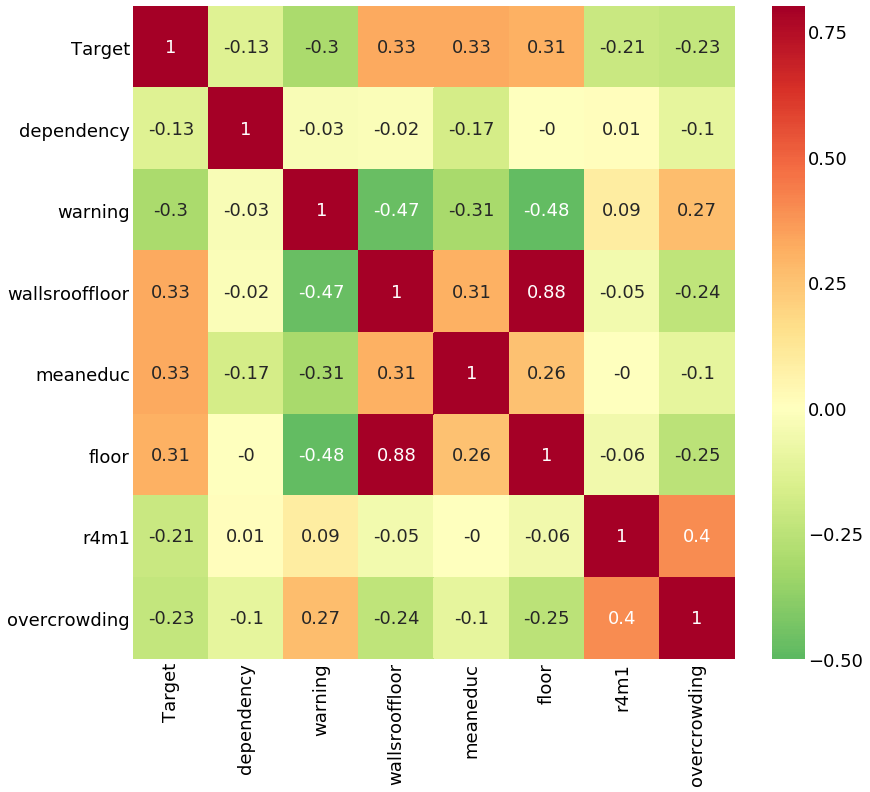

In [72]:
#Correlation heatmap
variables = ['Target','dependency','warning','wallsrooffloor','meaneduc','floor', 'r4m1', 'overcrowding']
corr_mat = train_heads[variables].corr().round(2)

plt.rcParams['font.size'] = 18
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat,vmin=-0.5,vmax=0.8,center=0,cmap = plt.cm.RdYlGn_r, annot = True)

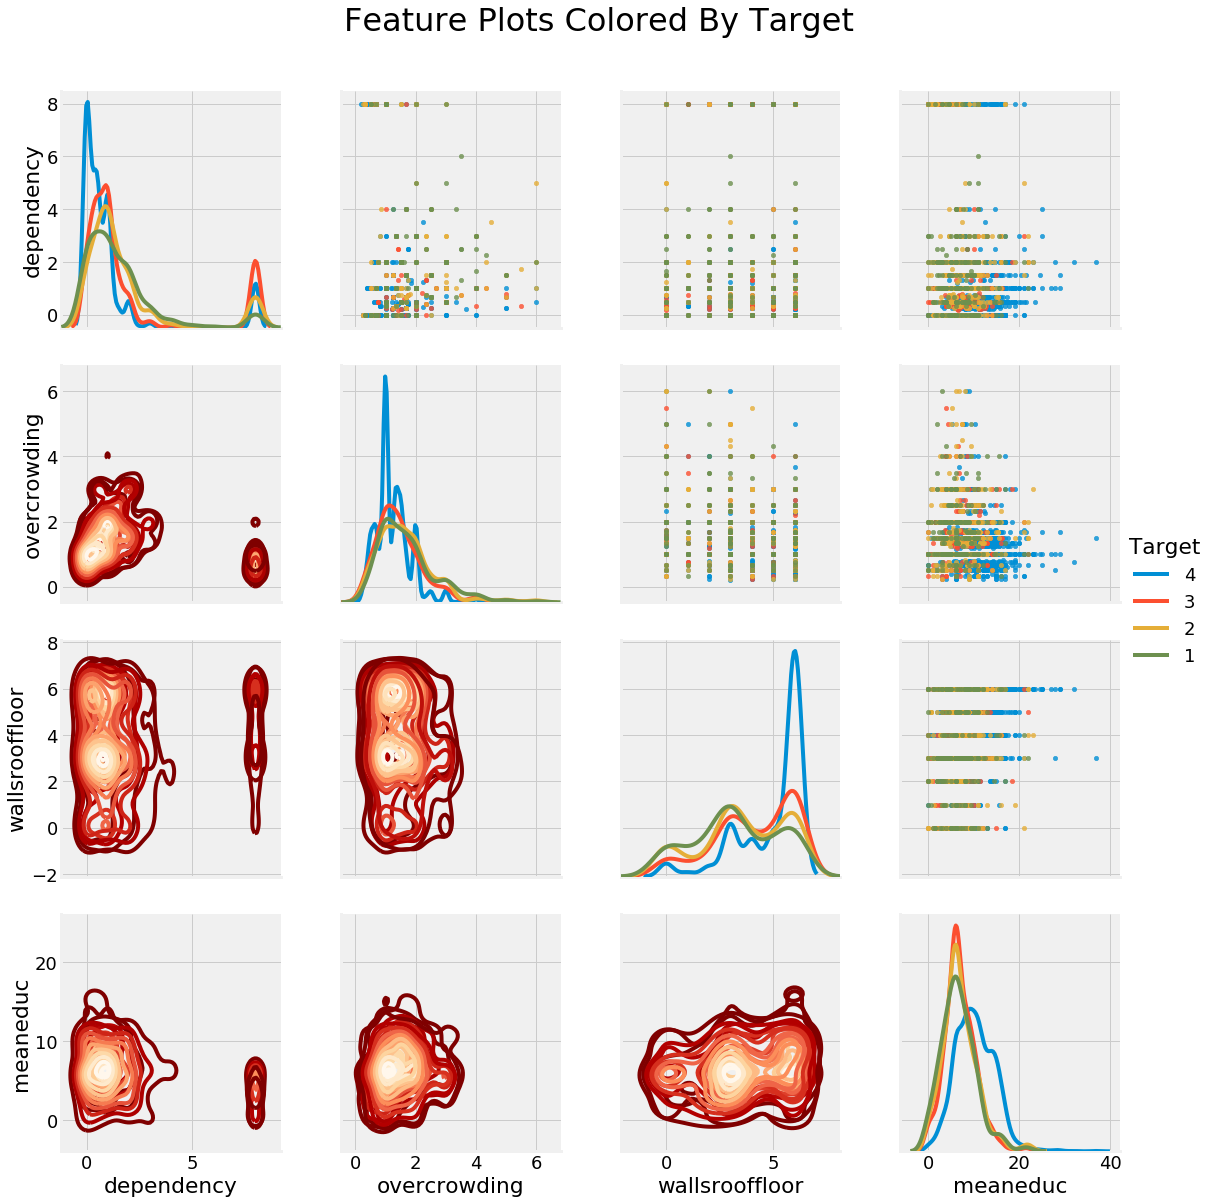

In [73]:
import warnings
warnings.filterwarnings('ignore')

plot_data = train_heads[['Target','dependency','overcrowding','wallsrooffloor','meaneduc']]

grid = sns.PairGrid(plot_data,hue='Target',hue_order=[4,3,2,1],size=4,diag_sharey=False,vars = [x for x in list(plot_data.columns) if x != 'Target'])

grid.map_upper(plt.scatter,alpha=0.8,s=20)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot,cmap=plt.cm.OrRd_r)
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

### <font color="#135589">Individual Level variables</font>

In [74]:
ind = data[id_+ind_bool + ind_ordered]
ind.shape

(33413, 40)

#### <font color="orange">Removing Redundant variables</font> 

In [75]:
corr_matrix = ind.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]
to_drop

['female']

In [76]:
ind = ind.drop(columns='male')

#### <font color="orange">Creating Ordinal Variables</font>

In [77]:
#Converting instlevel (represents education level of individuals)
ind[[c for c in ind if c.startswith('instl')]].head()

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [78]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]),axis=1)

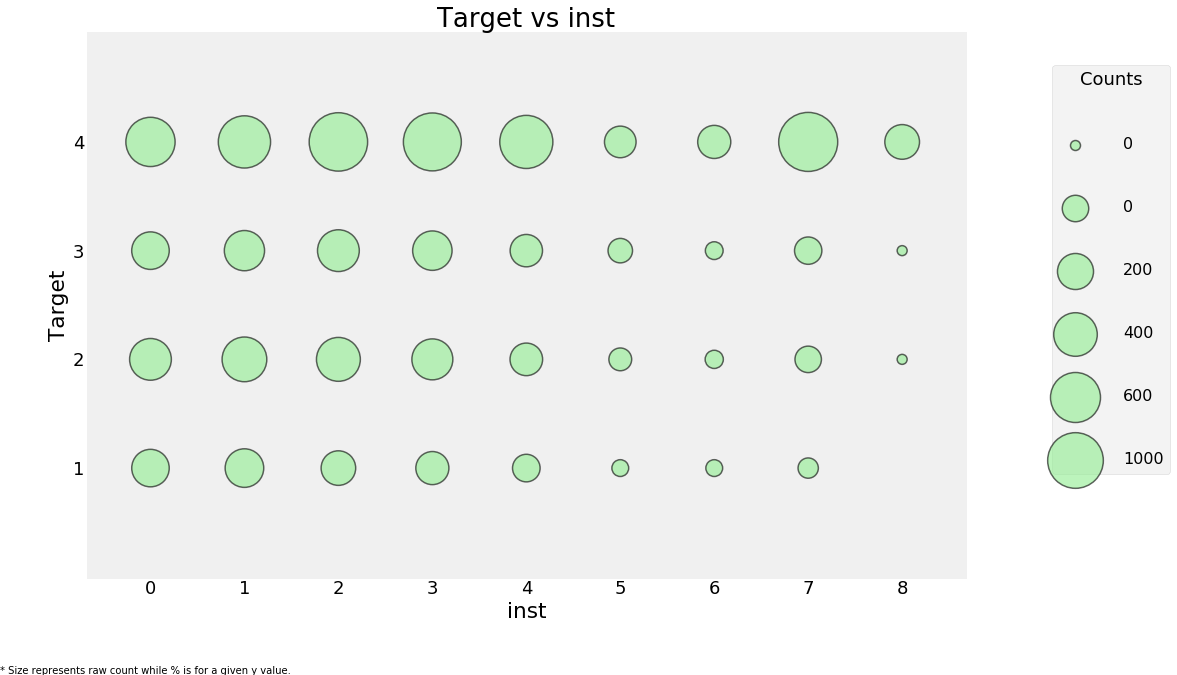

In [79]:
plot_categoricals('inst','Target',ind,annotate=False)

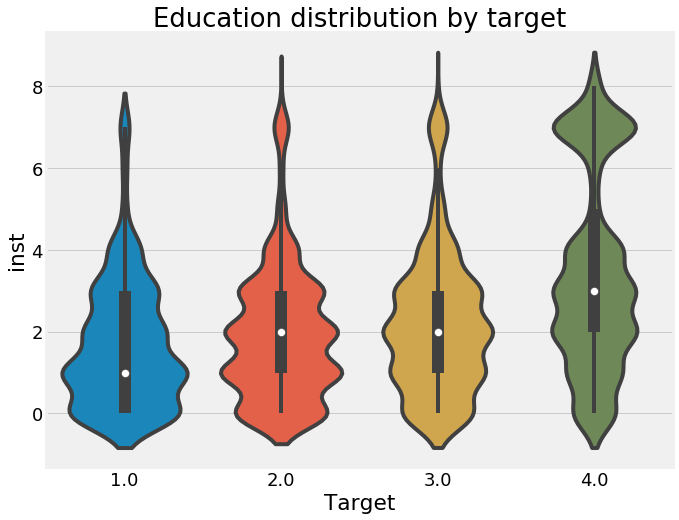

In [80]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Target',y='inst',data=ind)
plt.title('Education distribution by target')
plt.show()

In [81]:
ind = ind.drop(columns = [c for c in ind if c.startswith('instlevel')])
ind.shape

(33413, 31)

#### <font color="orange">Feature Construction</font>

Creating features as </br>
1. Years of Schooling / age </br>
2. Education Level / age </br>
3. Total number of gadgets </br>

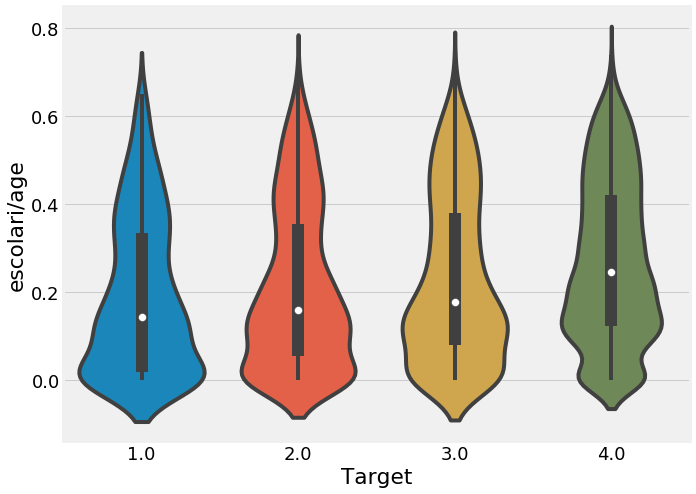

In [82]:
#Years of schooling by age
ind['escolari/age'] = ind['escolari']/ind['age']
plt.figure(figsize=(10,8))
sns.violinplot('Target','escolari/age',data=ind)

In [83]:
#Education Level by age
ind['inst/age'] = ind['inst']/ind['age']

In [84]:
#Total number of gadgets
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

In [85]:
#Aggregating individual data on household level
range_ = lambda x:x.max() - x.min()
range_.__name__ = 'range_'
ind_agg = ind.drop(columns=['Target']).groupby('idhogar').agg(['min','max','sum','count','std',range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

In [86]:
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_,female-min,female-max,female-sum,female-count,female-std,female-range_,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,estadocivil6-range_,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-count,estadocivil7-std,estadocivil7-range_,parentesco1-min,parentesco1-max,parentesco1-sum,parentesco1-count,parentesco1-std,parentesco1-range_,parentesco2-min,parentesco2-max,parentesco2-sum,parentesco2-count,parentesco2-std,parentesco2-range_,parentesco3-min,parentesco3-max,parentesco3-sum,...,parentesco8-count,parentesco8-std,parentesco8-range_,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco9-count,parentesco9-std,parentesco9-range_,parentesco10-min,parentesco10-max,parentesco10-sum,parentesco10-count,parentesco10-std,parentesco10-range_,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco11-count,parentesco11-std,parentesco11-range_,parentesco12-min,parentesco12-max,parentesco12-sum,parentesco12-count,parentesco12-std,parentesco12-range_,mobilephone-min,mobilephone-max,mobilephone-sum,mobilephone-count,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,rez_esc-sum,rez_esc-count,rez_esc-std,rez_esc-range_,escolari-min,escolari-max,escolari-sum,escolari-count,escolari-std,escolari-range_,age-min,age-max,age-sum,age-count,age-std,age-range_,inst-min,inst-max,inst-sum,inst-count,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-count,escolari/age-std,escolari/age-range_,inst/age-min,inst/age-max,inst/age-sum,inst/age-count,inst/age-std,inst/age-range_,tech-min,tech-max,tech-sum,tech-count,tech-std,tech-range_
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,0.000000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,2,3,0.57735,1,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.000000,0,0,0,0,3,0.0,0,0,0,0,3,0.00000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,1,...,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,1,1,3,3,0.0,0,0.0,0.0,0.0,3,0.0,0.0,0,14,26,3,7.571878,14,4,30,62,3,14.468356,26,0,7,14,3,4.041452,7,0.000000,0.500000,0.900000,3,0.264575,0.500000,0.000000,0.250000,0.483333,3,0.139775,0.250000,2,2,6,3,0.0,0
000bce7c4,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,2,0.000000,0,0,0,0,2,0.00000,0,1,1,2,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,...,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,1,1,2,2,0.0,0,0.0,0.0,0.0,2,0.0,0.0,0,5,5,2,3.535534,5,60,63,123,2,2.121320,3,0,1,1,2,0.707107,1,0.000000,0.083333,0.083333,2,0.058926,0.083333,0.000000,0.016667,0.016667,2,0.011785,0.016667,1,1,2,2,0.0,0
001845fb0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,1,2,4,0.577350,1,0,0,0,4,0.000000,0,0,1,2,4,0.57735,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,0,0,4,0.0,0,0,1,2,4,0.57735,1,0,1,1,4,0.500000,1,0,1,1,4,0.500000,1,0,1,2,...,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.0,0,1,1,4,4,0.0,0,0.0,0.0,0.0,4,0.0,0.0,6,14,41,4,3.304038,8,19,52,142,4,16.421531,33,2,7,16,4,2.160247,5,0.115385,0.526316,1.397906,4,0.183106,0.410931,0.038462,0.166667,0.511959,4,0.060123,0.128205,1,1,4,4,0.0,0
001ff74ca,1,1,2,2,0.0,0,0,0,0,2,0.000000,0,1,1,2,2,0.000000,0,0

#### <font color="orange">Feature Selection using Measuring relationship</font>

In [87]:
#As a first step remove all the columns where correlation is greater than 0.95
corr_matrix = ind_agg.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(np.abs(upper[column])>0.95)]
print(f'There are {len(to_drop)} correlated columns to remove.')
ind_agg = ind_agg.drop(columns = to_drop)

There are 85 correlated columns to remove.


In [88]:
ind_feats = list(ind_agg.columns)
# Merge on the household id
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')
print('Final features shape: ', final.shape)
print(final.head())

Final features shape:  (10307, 190)
             Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
0            0          0            0         0         0          0   
1            0          0            0         0         1          0   
2            0          0            0         0         1          0   
3            0          0            0         0         0          0   
4            0          0            0         0         0          0   

   paredfibras  paredother  pisomoscer

In [89]:
#Final relationships
corrs = final.corr()['Target']
print(corrs.sort_values().head())
print(corrs.sort_values().dropna().tail())

warning            -0.301791
hogar_nin          -0.266309
r4t1               -0.260917
estadocivil1-sum   -0.239130
overcrowding       -0.234954
Name: Target, dtype: float64
wallsrooffloor    0.332446
meaneduc          0.333652
inst-max          0.368229
escolari-max      0.373091
Target            1.000000
Name: Target, dtype: float64


In [90]:
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female': 'female-head'})
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

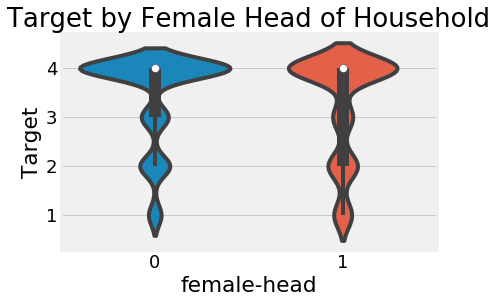

In [91]:
sns.violinplot(x = 'female-head', y = 'Target', data = final);
plt.title('Target by Female Head of Household');

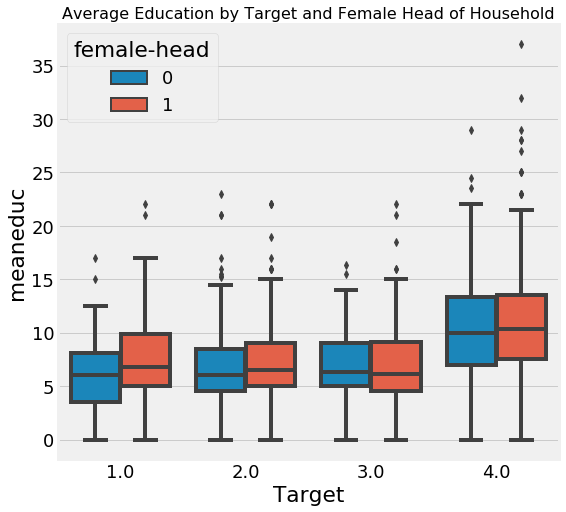

In [92]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final);
plt.title('Average Education by Target and Female Head of Household', size = 16);

# <font color="#2086BA">4. Machine Learning Modelling</font> 

In [93]:
from sklearn.metrics import f1_score,make_scorer
scorer = make_scorer(f1_score,greater_is_better=True,average='macro')

In [94]:
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))
train_set = final[final['Target'].notnull()].drop(columns=['Id','idhogar','Target'])
test_set = final[final['Target'].isnull()].drop(columns=['Id','idhogar','Target'])
submission_base = df_test[['Id','idhogar']].copy()

In [95]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
features = list(train_set.columns)
pipeline = Pipeline([('imputer',Imputer(strategy='median')),('scaler',MinMaxScaler())])

In [96]:
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.fit_transform(test_set)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100,random_state=10,n_jobs=-1)
cv_score = cross_val_score(model,train_set,train_labels,cv=10,scoring=scorer)
print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


10 Fold Cross Validation F1 Score = 0.341 with std = 0.0426


This score will serve as the baseline score

In [98]:
model.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

,feature,importance
0,hacdor,0.000793
1,hacapo,0.000479
2,v14a,0.000403
3,refrig,0.001412
4,paredblolad,0.006185


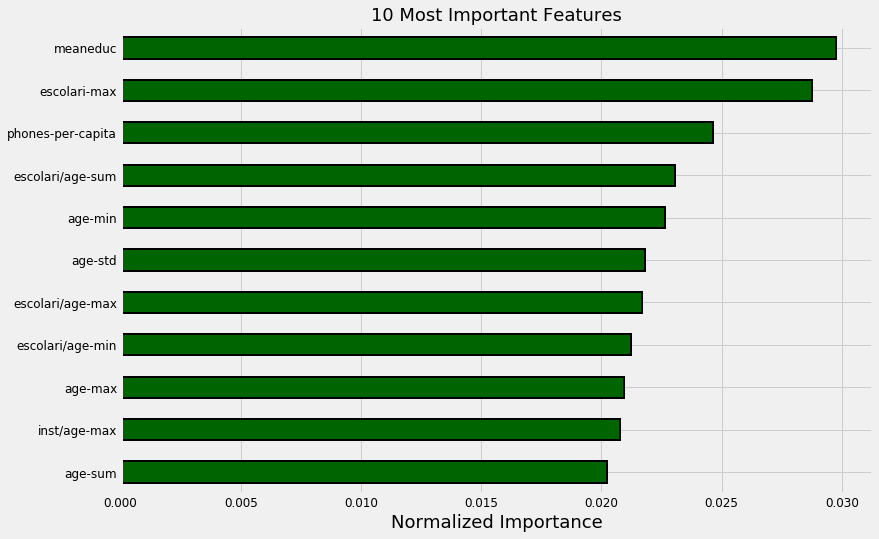

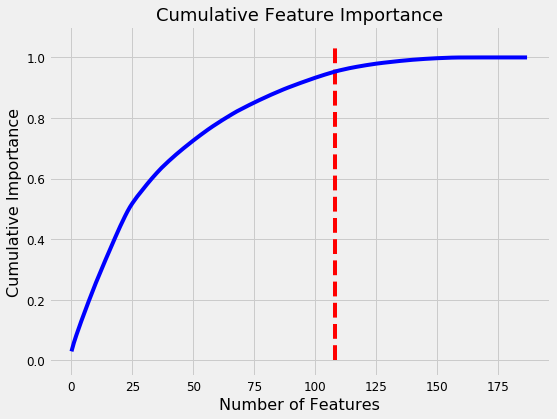

108 features required for 95% of cumulative importance.


In [99]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

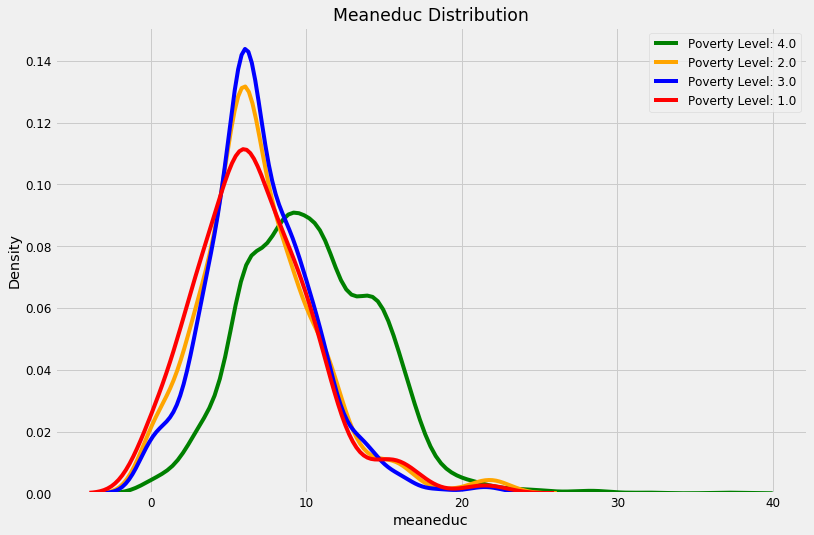

In [100]:
kde_target(final, 'meaneduc')

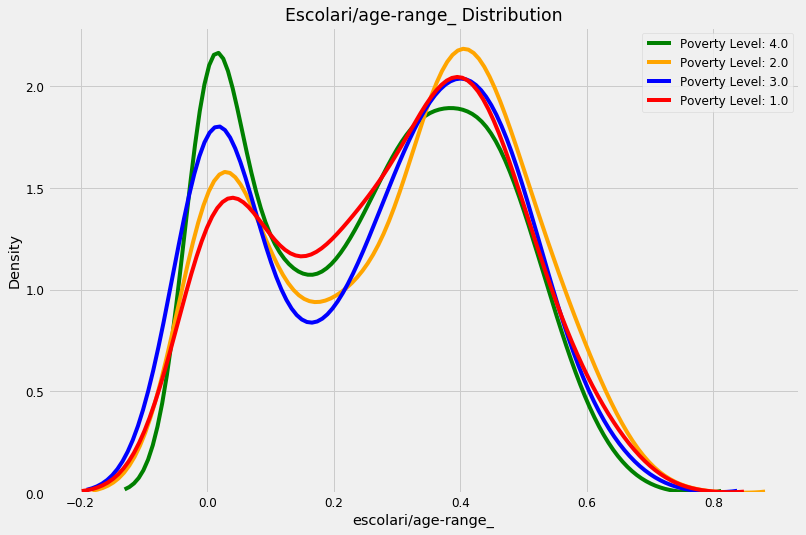

In [101]:
kde_target(final, 'escolari/age-range_')

# <font color="#2086BA">5. Model Selection</font> 

In [102]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore',category = ConvergenceWarning)
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)

model_results = pd.DataFrame(columns=['model','cv_mean','cv_std'])
def cv_model(train,train_labels,model,name,model_results=None):
    cv_scores = cross_val_score(model,train,train_labels,cv=10,scoring=scorer,n_jobs=-1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name,'cv_mean': cv_scores.mean(),'cv_std': cv_scores.std()},
                                                           index = [0]),ignore_index = True)
        return model_results

#### <font color="orange">Linear Support Vector Machine</font>

In [103]:
from sklearn.svm import LinearSVC
model_results = cv_model(train_set,train_labels,LinearSVC(),'LSVC',model_results)

10 Fold CV Score: 0.27842 with std: 0.04469


#### <font color="orange">Gaussian Naive Bayes</font>

In [104]:
from sklearn.naive_bayes import GaussianNB
model_results = cv_model(train_set,train_labels,GaussianNB(),'GNB',model_results)

10 Fold CV Score: 0.18746 with std: 0.04413


#### <font color="orange">Multi Layer preceptron Classifier (Neural Network)</font>

In [105]:
from sklearn.neural_network import MLPClassifier
model_results = cv_model(train_set,train_labels,MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),'MLPC',model_results)

10 Fold CV Score: 0.29719 with std: 0.05146


#### <font color="orange">Linear Discriminant Analysis</font>

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_results = cv_model(train_set,train_labels,LinearDiscriminantAnalysis(),'LDA',model_results)

10 Fold CV Score: 0.30906 with std: 0.05931


#### <font color="orange">Linear Ridge Classifer</font>

In [107]:
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
model_results = cv_model(train_set,train_labels,RidgeClassifierCV(),'RIDGE',model_results)

10 Fold CV Score: 0.27814 with std: 0.0342


#### <font color="orange">K Nearest Neighbour</font>

In [108]:
from sklearn.neighbors import KNeighborsClassifier
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels,KNeighborsClassifier(n_neighbors = n),f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.3216 with std: 0.02019

KNN with 10 neighbors

10 Fold CV Score: 0.30062 with std: 0.04026

KNN with 20 neighbors

10 Fold CV Score: 0.26966 with std: 0.02236


#### <font color="orange">Extra Tree Classifier</font>

In [109]:
from sklearn.ensemble import ExtraTreesClassifier
model_results = cv_model(train_set, train_labels,ExtraTreesClassifier(n_estimators = 100, random_state = 10),'EXT', model_results)

10 Fold CV Score: 0.32225 with std: 0.04806


#### <font color="orange">Random Forest Claasifier</font> 

In [110]:
from sklearn.ensemble import RandomForestClassifier
model_results = cv_model(train_set, train_labels,RandomForestClassifier(100, random_state=10),'RF', model_results)

10 Fold CV Score: 0.34097 with std: 0.04262


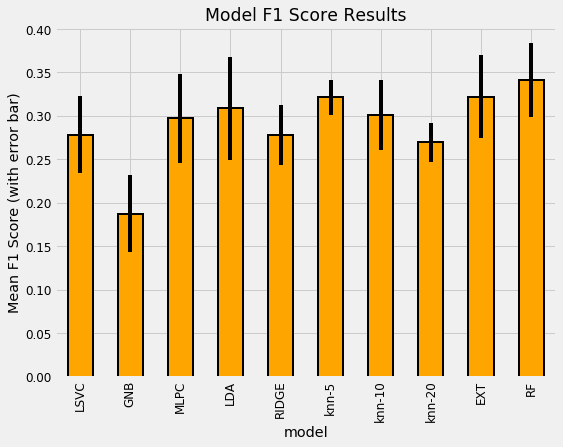

In [111]:
model_results.set_index('model',inplace=True)
model_results['cv_mean'].plot.bar(color='orange',figsize=(8,6),yerr=list(model_results['cv_std']),edgecolor='k',linewidth=2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

### <font color="#135589">Feature Selection</font>

In [112]:
train_set = pd.DataFrame(train_set,columns=features)
corr_matrix = train_set.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper if any(abs(upper[column])>0.95)]
to_drop

['v18q-count', 'female-sum']

In [113]:
train_set = train_set.drop(columns = to_drop)
train_set.shape

(2973, 186)

In [114]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

##### <font color="orange">Recursive Feature Elimination with Random Forest</font>

In [115]:
from sklearn.feature_selection import RFECV
estimator = RandomForestClassifier(random_state=10,n_estimators=100,n_jobs=-1)
selector = RFECV(estimator,step=1,cv=3,scoring=scorer,n_jobs=-1)

In [116]:
selector.fit(train_set,train_labels)

RFECV(cv=3,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
   n_jobs=-1, scoring=make_scorer(f1_score, average=macro), step=1,
   verbose=0)

96

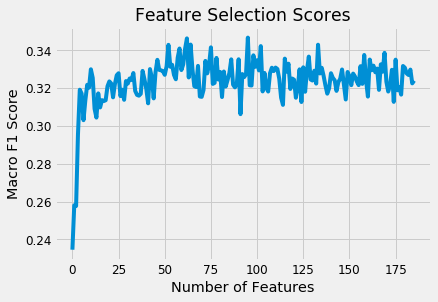

In [117]:
plt.plot(selector.grid_scores_);
plt.xlabel('Number of Features'); plt.ylabel('Macro F1 Score'); plt.title('Feature Selection Scores');
selector.n_features_

In [118]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

,feature,rank
185,female-head,1
72,tamviv,1
71,v18q1,1
70,r4t2,1
69,r4t1,1
68,r4m3,1
67,r4m2,1
66,r4m1,1
65,r4h3,1
64,r4h2,1


In [119]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [120]:
# Convert back to dataframe
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [121]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.35348 with std: 0.0408


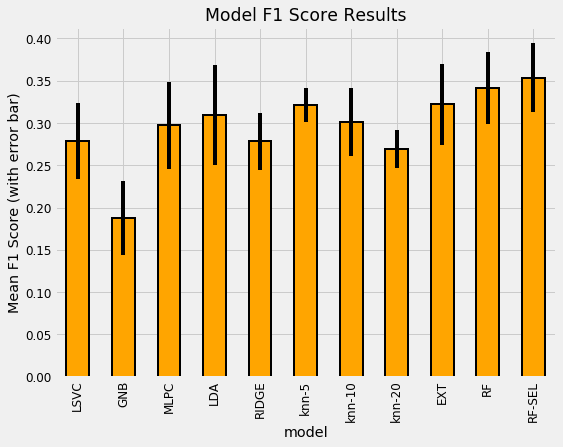

In [122]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [123]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display

In [128]:
def macro_f1_score(labels, predictions):
    # Reshape the predictions as needed
    predictions = predictions.reshape(len(np.unique(labels)), -1 ).argmax(axis = 0)
    
    metric_value = f1_score(labels, predictions, average = 'macro')
    
    # Return is name, value, is_higher_better
    return 'macro_f1', metric_value, True

In [125]:
def model_gbm(features, labels, test_features, test_ids,nfolds = 5, return_preds = False, hyp = None):
    feature_names = list(features.columns)
    if hyp is not None:
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    else:
        # Model hyperparameters
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced'}
    
    # Build the model
    model = lgb.LGBMClassifier(**params, objective = 'multiclass', n_jobs = -1, n_estimators = 10000,random_state = 10)
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    # Hold all the predictions from each fold
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))
    # Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1 ))
    valid_scores = []
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        # Dataframe for fold predictions
        fold_predictions = pd.DataFrame()
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 200)
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        # Make predictions from the fold as probabilities
        fold_probabilitites = model.predict_proba(test_features)
        # Record each prediction for each class as a separate column
        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]
            
        # Add needed information for predictions 
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        # Add the predictions as new rows to the existing predictions
        predictions = predictions.append(fold_predictions)
        
        # Feature importances
        importances += model.feature_importances_ / nfolds   
        
        # Display fold information
        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')
    
    # If we want to examine predictions don't average over folds
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances
    
    # Average the predictions over folds
    predictions = predictions.groupby('idhogar', as_index = False).mean()
    
    # Find the class and associated probability
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])
    # Merge with the base to have one prediction for each individual
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
        
    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    # return the submission and feature importances along with validation scores
    return submission, feature_importances, valid_scores

In [129]:
%%capture --no-display
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])
predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=True)

'Fold 1, Validation Score: 0.39712, Estimators Trained: 122'

'Fold 2, Validation Score: 0.39341, Estimators Trained: 158'

'Fold 3, Validation Score: 0.43267, Estimators Trained: 11'

'Fold 4, Validation Score: 0.40646, Estimators Trained: 7'

'Fold 5, Validation Score: 0.41625, Estimators Trained: 71'

'5 cross validation score: 0.40918 with std: 0.01417.'

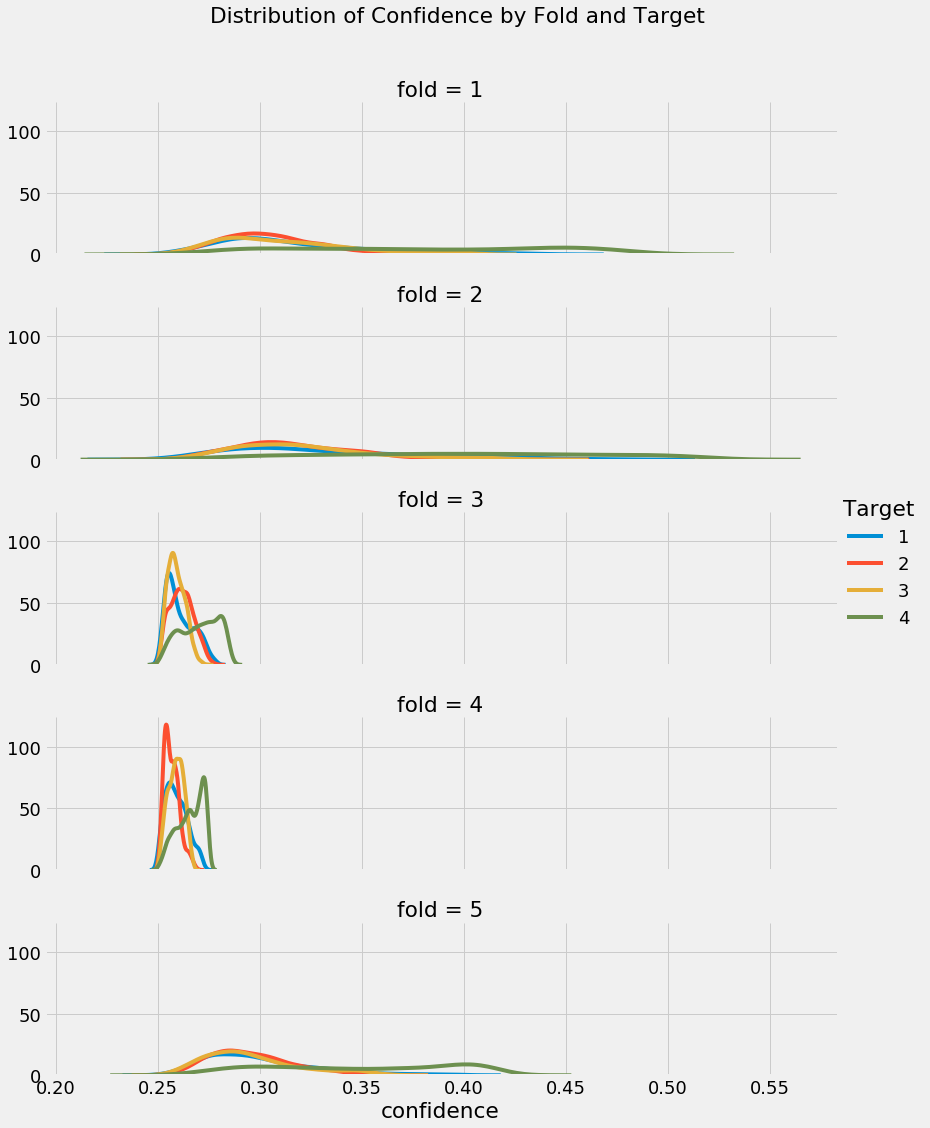

In [130]:
plt.rcParams['font.size'] = 18

# Kdeplot
g = sns.FacetGrid(predictions, row = 'fold', hue = 'Target', size = 3, aspect = 4)
g.map(sns.kdeplot, 'confidence');
g.add_legend();

plt.suptitle('Distribution of Confidence by Fold and Target', y = 1.05);

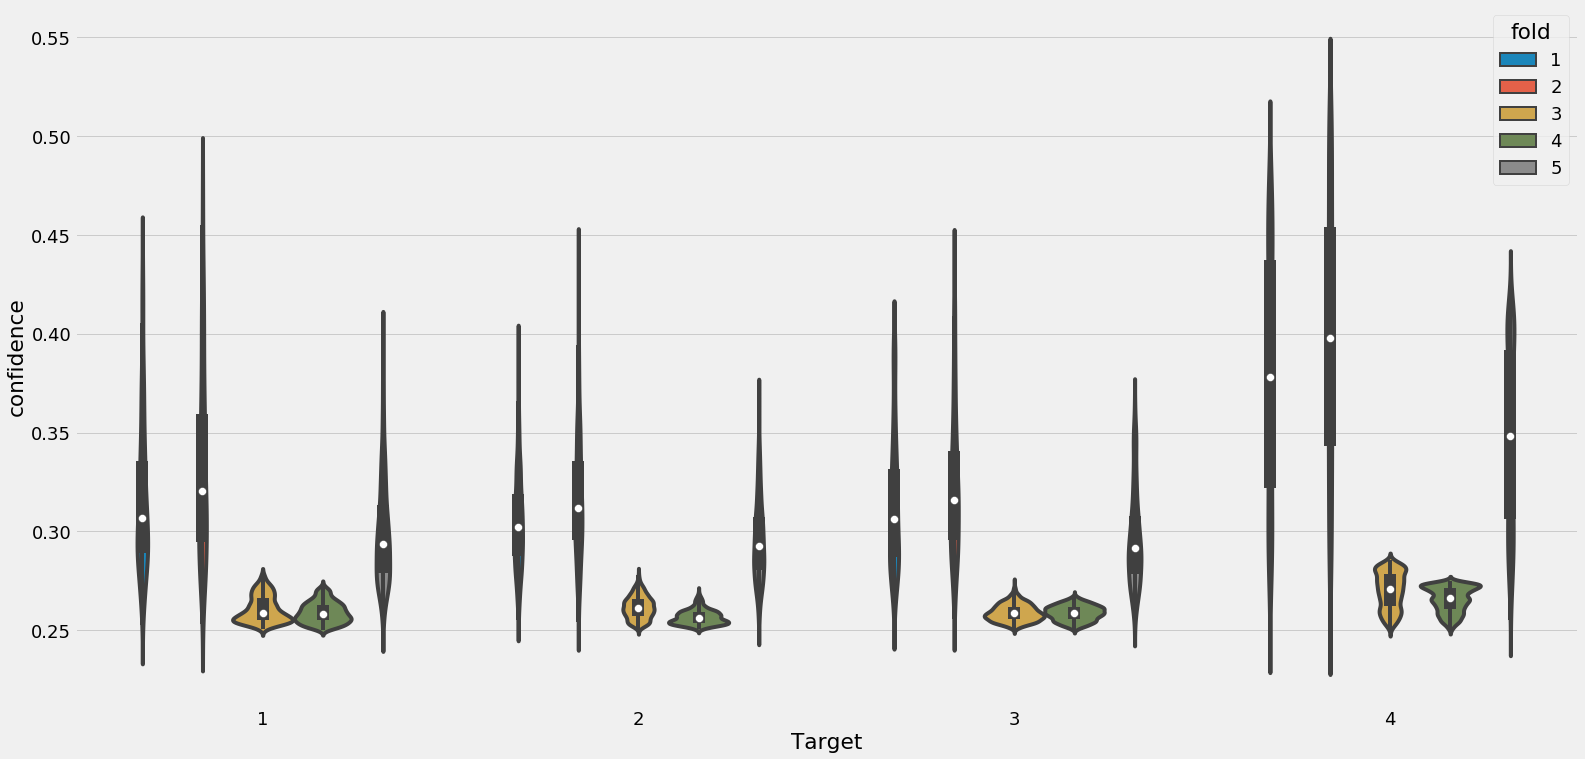

In [131]:
plt.figure(figsize = (24, 12))
sns.violinplot(x = 'Target', y = 'confidence', hue = 'fold', data = predictions);

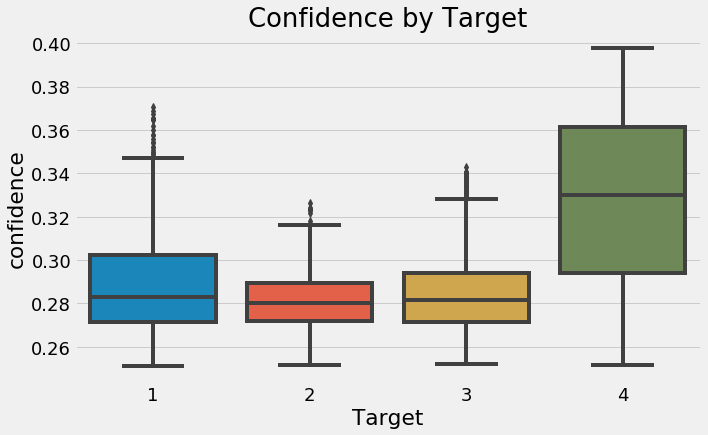

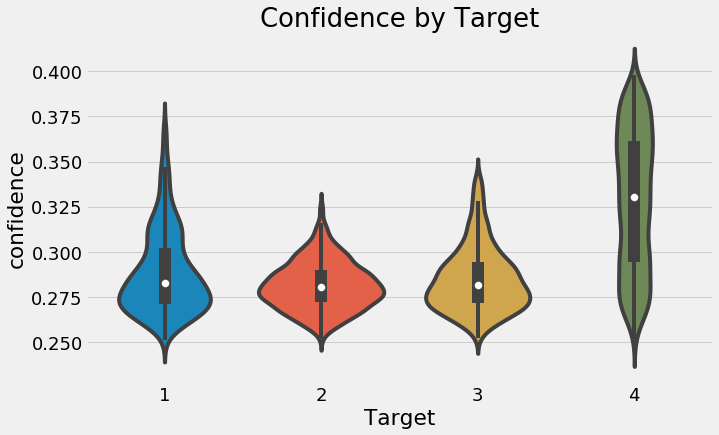

In [132]:
# Average the predictions over folds
predictions = predictions.groupby('idhogar', as_index = False).mean()

# Find the class and associated probability
predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
predictions = predictions.drop(columns = ['fold'])

# Plot the confidence by each target
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'confidence', data = predictions);
plt.title('Confidence by Target');

plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Target', y = 'confidence', data = predictions);
plt.title('Confidence by Target');

In [133]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=False)

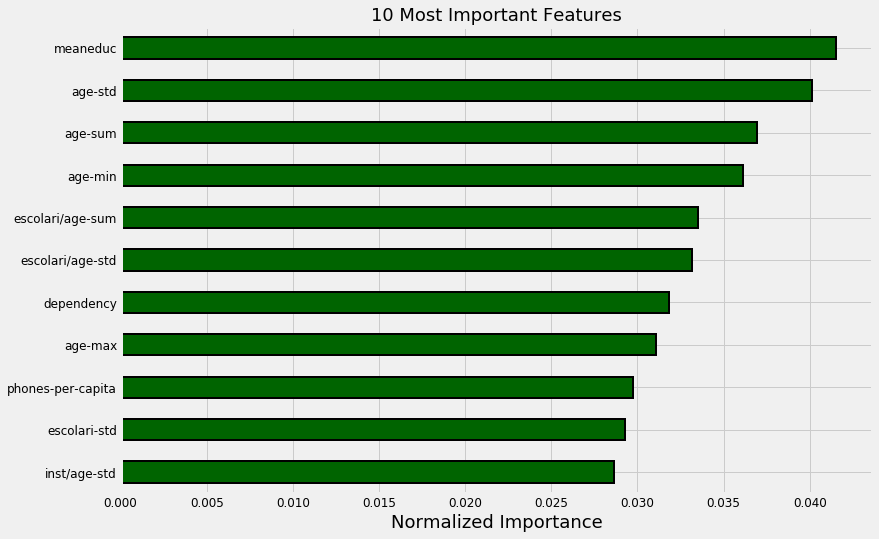

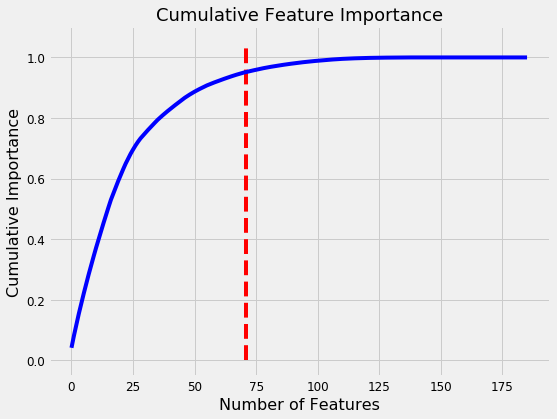

71 features required for 95% of cumulative importance.


In [134]:
_ = plot_feature_importances(gbm_fi, threshold=0.95)

In [135]:
%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels,test_selected, test_ids)

'Fold 1, Validation Score: 0.40998, Estimators Trained: 66'

'Fold 2, Validation Score: 0.40957, Estimators Trained: 5'

'Fold 3, Validation Score: 0.42156, Estimators Trained: 6'

'Fold 4, Validation Score: 0.40327, Estimators Trained: 124'

'Fold 5, Validation Score: 0.42296, Estimators Trained: 74'

'5 cross validation score: 0.41347 with std: 0.00758.'

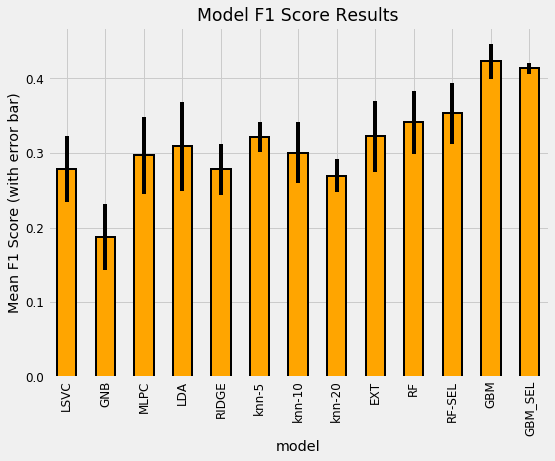

In [136]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM", "GBM_SEL"],'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),sort = True)
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

# <font color="#2086BA">5. Model Optimization</font> 

# <font color="#2086BA">6. Implementation</font>

# <font color="#2086BA">7. Investigating Predictions</font> 

# <font color="#2086BA">8. Trying New techniques</font> 

# <font color="#2086BA">Utilities</font>

In [2]:
def plot_value_counts(df,col,heads_only = False):
    '''
    This funtions will be used to plot bar graph
    for value counts of the columns
    '''
    if heads_only:
        df = df.loc[df['parentesco1']==1,:]
        
    plt.figure(figsize=(8,6))
    df[col].value_counts().sort_index().plot.bar(color='blue',edgecolor='k',linewidth=2)
    plt.xlabel(col);plt.title("{0} value counts".format(col));plt.ylabel('Count')
    plt.show()

In [3]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

In [4]:
from scipy.stats import spearmanr
def plot_corrs(x, y):
    """Plot data and show the spearman and pearson correlation."""
    
    # Calculate correlations
    spr = spearmanr(x, y).correlation
    pcr = np.corrcoef(x, y)[0, 1]
    
    # Scatter plot
    data = pd.DataFrame({'x': x, 'y': y})
    plt.figure( figsize = (6, 4))
    sns.regplot('x', 'y', data = data, fit_reg = False);
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

In [5]:

def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

In [6]:
def kde_target(df, variable):
    """Plots the distribution of `variable` in `df` colored by the `Target` column"""
    
    colors = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}

    plt.figure(figsize = (12, 8))
    
    df = df[df['Target'].notnull()]
    
    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Poverty Level: {level}', 
                    color = colors[int(subset['Target'].unique())])

    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));